#Email/SMS Spam Detection
Done by:
*     Muhammad Hammad:   F2019266348



In [ ]:
import numpy as np
import pandas as pd

##1. Dataset loading & Preparation




In [ ]:
Ffile = open('spam.csv', encoding = "ISO-8859-1")

In [ ]:
df = pd.read_csv(Ffile)

In [ ]:
df.sample(7)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3569,spam,Customer Loyalty Offer:The NEW Nokia6650 Mobil...,NaN,NaN,NaN
1943,ham,I got lousy sleep. I kept waking up every 2 ho...,NaN,NaN,NaN
728,ham,Exactly. Anyways how far. Is jide her to study...,NaN,NaN,NaN
946,spam,Ur cash-balance is currently 500 pounds - to m...,NaN,NaN,NaN
2933,ham,Yup n her fren lor. I'm meeting my fren at 730.,NaN,NaN,NaN
5406,ham,Dear are you angry i was busy dear,NaN,NaN,NaN
3705,ham,Reading gud habit.. Nan bari hudgi yorge patai...,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


##2. Data Cleaning
Since the dataset is loaded and ready to work on. The next step is to clean the data and remove any anomalities.

In [ ]:
#remove unecessary columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.sample(7)

,v1,v2
2916,ham,Yes. that will be fine. Love you. Be safe.
2405,ham,I'm meeting Darren...
2248,ham,will you like to be spoiled? :)
4303,ham,"Good good, billy mates all gone. Just been jog..."
2191,ham,Thankyou so much for the call. I appreciate yo...
3270,spam,You have 1 new voicemail. Please call 08719181...
1773,ham,"I'm not coming over, do whatever you want"


In [ ]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [ ]:
df.sample()

,target,text
4277,ham,I've reached home finally...


In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [ ]:
df['target'] = enc.fit_transform(df['target'])
df.sample(5)

,target,text
515,0,S:)no competition for him.
5249,0,"K I'm leaving soon, be there a little after 9"
1341,0,Just chill for another 6hrs. If you could slee...
5126,0,"To the wonderful Okors, have a great month. We..."
3749,0,"Buzz! Hey, my Love ! I think of you and hope y..."


### Not spam = 0 
### Spam = 1

In [ ]:
#remove the missing values if there are any
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
#and also remove the duplicate values if there are any
df.duplicated().sum()

403

In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

##3. Exploratory Data Analysis
This requires to get some insights out of dataset before start implementing model. These insights can help to define model more thoroughly and get an accurate result out of it.

In [ ]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [ ]:
import matplotlib.pyplot as plt


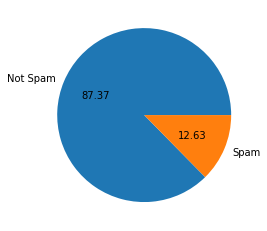

In [ ]:
plt.pie(df['target'].value_counts(),labels=['Not Spam','Spam'],autopct='%0.2f')
plt.show()

In [ ]:
#import natural language toolkit to do a thorough EDA on dataset
import nltk

In [ ]:
nltk.download('punkt') 
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#to get num of characters from each text
df['character_count'] = df['text'].apply(len)

In [ ]:
#df = df.drop(columns='num_ofcharacters')
df.sample(5)

,target,text,character_count
1803,0,I'm in class. Did you get my text.,34
2988,1,No 1 POLYPHONIC tone 4 ur mob every week! Just...,147
4680,0,Are you staying in town ?,25
303,0,He is a womdarfull actor,24
465,0,great princess! I love giving and receiving or...,148


In [ ]:
  #word count in a text
  df['word_count'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [ ]:
df.sample(5)

,target,text,character_count,word_count
4106,1,HOT LIVE FANTASIES call now 08707500020 Just 2...,122,25
821,0,On the road so cant txt,23,6
5107,0,I REALLY NEED 2 KISS U I MISS U MY BABY FROM U...,57,15
3600,0,"Jay told me already, will do",28,7
1830,0,That's the way you should stay oh.,34,9


In [ ]:
  #Sentence count in a text
  df['sentence_count'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
df.sample(5)

,target,text,character_count,word_count,sentence_count
2875,0,Fuck cedar key and fuck her (come over anyway ...,50,12,1
1370,0,Hope you are feeling great. Pls fill me in. Ab...,50,12,3
2341,0,Tell dear what happen to you. Why you talking ...,65,15,2
129,0,K..k:)how much does it cost?,28,11,1
985,0,Carlos says he'll be at mu in &lt;#&gt; minutes,49,16,1


In [ ]:
df[['character_count','word_count','sentence_count']].describe()

,character_count,word_count,sentence_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [ ]:
#for not spam messages
df[df['target']==0][['character_count','word_count','sentence_count']].describe()

,character_count,word_count,sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [ ]:
#for spam messages
df[df['target']== 1 ][['character_count','word_count','sentence_count']].describe()

,character_count,word_count,sentence_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [ ]:
import seaborn as sns

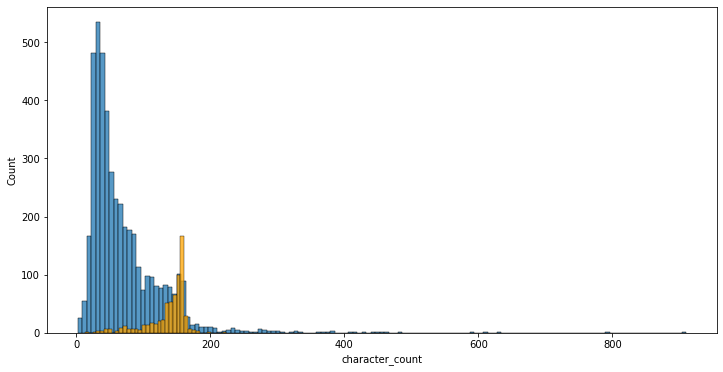

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['character_count'])
sns.histplot(df[df['target'] == 1]['character_count'],color='orange')

What this histogram describe is that usually spam messages have more character count than the not spam ones and same goes for the word count as well.

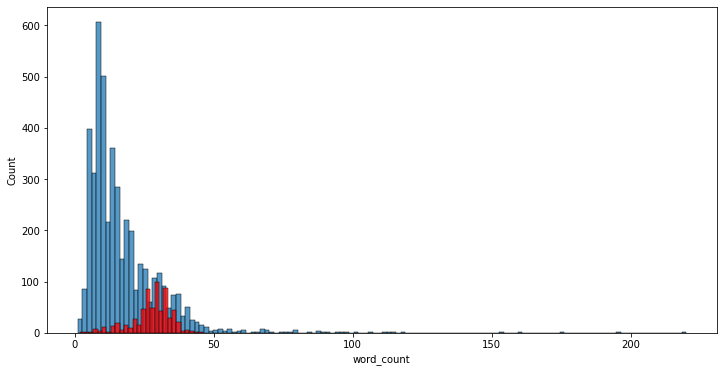

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['word_count'])
sns.histplot(df[df['target'] == 1]['word_count'],color='red')

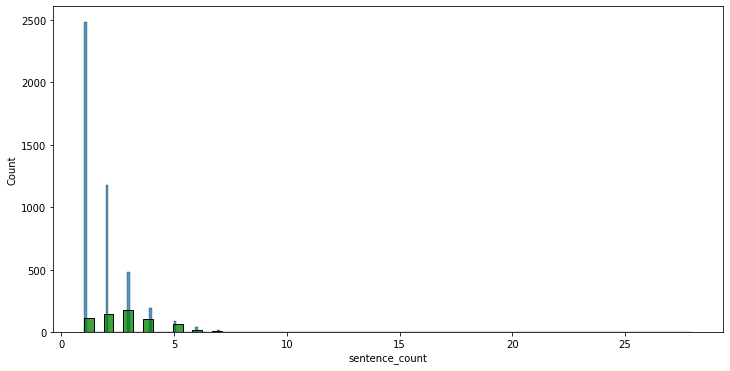

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['sentence_count'])
sns.histplot(df[df['target'] == 1]['sentence_count'],color='green')

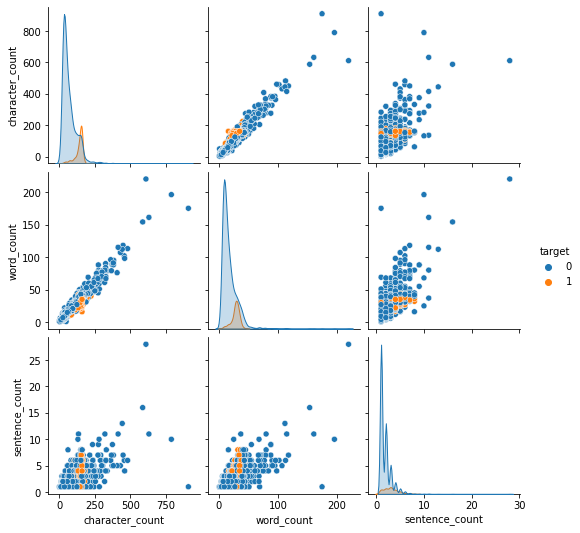

In [ ]:
sns.pairplot(df,hue='target')

As you can see, there are number of outliers in the dataset that can affect our result

##4. Data preprocessing
Here, we will convert our data into the simplest form so it can be used in the model without creating any problems

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def text_convert(text):
  #to convert it into the lowercare
  text = text.lower()
  #to make the tokens on each word
  text = nltk.word_tokenize(text)
  
  #to remove special characters like %,^,& etc.
  new = []
  for i in text:
    if i.isalnum():
      new.append(i)

  text = new[:]
  new.clear()

  #to remove stopwords and punctuation
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      new.append(i)

  text = new[:]
  new.clear()

  for i in text:
    new.append(ps.stem(i))

  return " ".join(new)

In [ ]:
#text_convert('HET! are you okay? thought you liked my new Flavor%^.')

In [ ]:
#used for stemming. Stemming is changing a word with different tense forms into a single one i.e. danced, dancing = dance
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer() 

In [ ]:
df['transformed_text'] = df['text'].apply(text_convert)
df.sample(5)

,target,text,character_count,word_count,sentence_count,transformed_text
1440,0,Cool breeze... Bright sun... Fresh flower... T...,134,31,2,cool breez bright sun fresh flower twitter bir...
856,0,Going to take your babe out ?,29,7,1,go take babe
844,0,K.k:)when are you going?,24,8,1,go
4431,0,Dont think you need yellow card for uk travel....,116,30,3,dont think need yellow card uk travel ask some...
3313,0,Oh gei. That happend to me in tron. Maybe ill ...,70,19,3,oh gei happend tron mayb ill dl 3d


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=600,height=500,min_font_size=10,background_color='black')

In [ ]:
spam_wordcloud = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

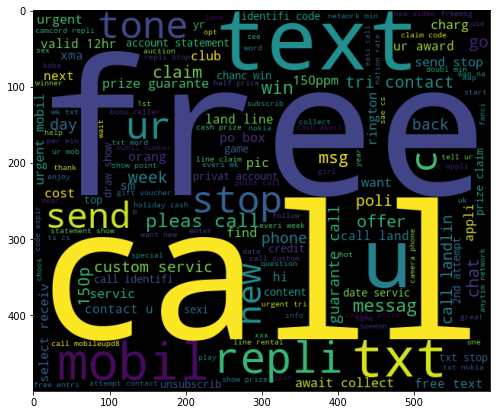

In [ ]:
plt.figure(figsize=(14,7))
plt.imshow(spam_wordcloud)

You can see which words are being frequently used in the spam text emails. For non-spam ones:

In [ ]:
notspam_wordcloud = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

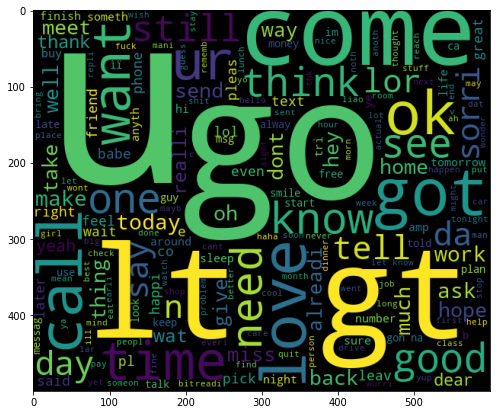

In [ ]:
plt.figure(figsize=(14,7))
plt.imshow(notspam_wordcloud)

To find top words from spam and not-spam texts:

In [ ]:
#to get all the words from every spam text message
wordlist = []
for text in df[df['target']==1]['transformed_text'].tolist():
  for word in text.split():
    wordlist.append(word)

In [ ]:
len(wordlist)


9939

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


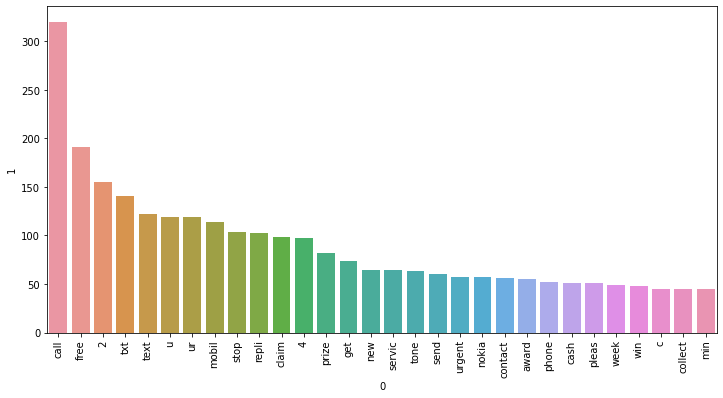

In [ ]:
#to get most commonly used spam words
from collections import Counter
plt.figure(figsize=(12,6))
sns.barplot(pd.DataFrame(Counter(wordlist).most_common(30))[0],pd.DataFrame(Counter(wordlist).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#to get all the words from every spam text message
notwordlist = []
for text in df[df['target']==0]['transformed_text'].tolist():
  for word in text.split():
    notwordlist.append(word)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


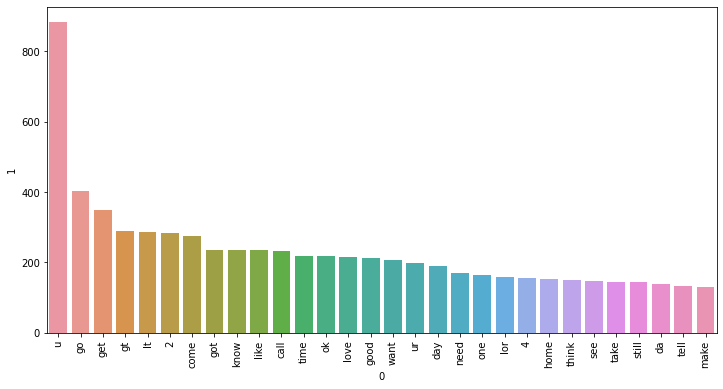

In [ ]:
from collections import Counter
plt.figure(figsize=(12,6))
sns.barplot(pd.DataFrame(Counter(notwordlist).most_common(30))[0],pd.DataFrame(Counter(notwordlist).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

##5. Text Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
x = tfidf.fit_transform(df['transformed_text']).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

##6. Splitting data into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

##7. Apply ML models

### -> Naive Bayes



In [ ]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import accuracy_score,precision_score

In [ ]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [ ]:
#For Gaussian Naive Bayes
gnb.fit(x_train,y_train)
gnb_pred = gnb.predict(x_test)
print("accuracy: ",accuracy_score(y_test,gnb_pred))
print("precision: ",precision_score(y_test,gnb_pred))

accuracy:  0.8694390715667312
precision:  0.5068493150684932


In [ ]:
#For Bernoulli Naive Bayes
bnb.fit(x_train,y_train)
bnb_pred = bnb.predict(x_test)
print("accuracy: ",accuracy_score(y_test,bnb_pred))
print("precision: ",precision_score(y_test,bnb_pred))

accuracy:  0.9835589941972921
precision:  0.991869918699187


In [ ]:
#For multinomial Naive Bayes
mnb.fit(x_train,y_train)
mnb_pred = mnb.predict(x_test)
print("accuracy: ",accuracy_score(y_test,mnb_pred))
print("precision: ",precision_score(y_test,mnb_pred))

accuracy:  0.9709864603481625
precision:  1.0


So we are going to choose Multinomial Naive bayes because it is giving 100% precision (as it has given zero value at False Positive)

Now we're going to try some other models as well to compare with each other on the basis of evaluation.


###-> Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5,random_state=2)

In [ ]:
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)

###-> Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(n_estimators=50,random_state=2)

In [ ]:
bc.fit(x_train,y_train)
bc_pred = bc.predict(x_test)

##8. Evaluation on test data
After apply different models on the training data, we are going to evaluate each model on the basis of some metrics.


In [ ]:
from sklearn.metrics import accuracy_score,precision_score

In [ ]:
accuracy = []
precision = []

a1 = accuracy_score(y_test,mnb_pred)
p1 = precision_score(y_test,mnb_pred)

print("Accuracy for Multinomial Naive Bayes is: ", a1)
print("Precision for Multinomial Naive Bayes is: ",p1)
accuracy.append(a1)
precision.append(p1)

a2 = accuracy_score(y_test,dt_pred)
p2 = precision_score(y_test,dt_pred)

print("Accuracy for Decision Tree Classifier is: ", a2)
print("Precision for Decision Tree Classifier is: ", p2)
accuracy.append(a2)
precision.append(p2)

a3 = accuracy_score(y_test,bc_pred)
p3 = precision_score(y_test,bc_pred)

print("Accuracy for Boosting Classifier is: ", a3)
print("Precision for Boosting Classifier is: ", p3)
accuracy.append(a3)
precision.append(p3)

Accuracy for Multinomial Naive Bayes is:  0.9709864603481625
Precision for Multinomial Naive Bayes is:  1.0
Accuracy for Decision Tree Classifier is:  0.9274661508704062
Precision for Decision Tree Classifier is:  0.8118811881188119
Accuracy for Boosting Classifier is:  0.9574468085106383
Precision for Boosting Classifier is:  0.8671875


In [ ]:
eva = pd.DataFrame({'Algorithms':['Naive Bayes','Decision Tree','Boosting'],'Accuracy':accuracy,'Precision':precision})
eva =  pd.melt(eva, id_vars = "Algorithms")
eva

,Algorithms,variable,value
0,Naive Bayes,Accuracy,0.970986
1,Decision Tree,Accuracy,0.927466
2,Boosting,Accuracy,0.957447
3,Naive Bayes,Precision,1.000000
4,Decision Tree,Precision,0.811881
5,Boosting,Precision,0.867188


##9. Results Visualizations

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

<Figure size 720x360 with 0 Axes>

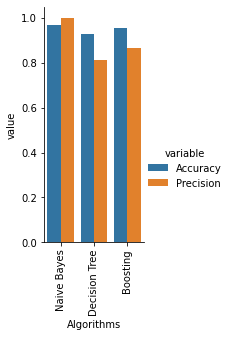

In [ ]:
plt.figure(figsize=(10,5))
sns.catplot(
    data=eva, x="Algorithms", y="value", hue = 'variable',
    kind="bar", height=4, aspect=.6,
)
plt.xticks(rotation='vertical')

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

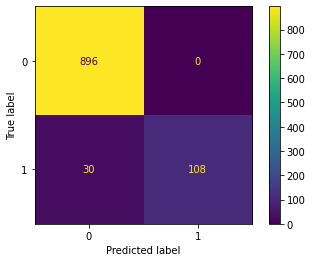

In [ ]:
cm = confusion_matrix(y_test, mnb_pred,labels=mnb.classes_)
matrix = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=mnb.classes_)
matrix.plot()